In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


Data Collection and Processing

In [35]:
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [36]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [37]:
 gold_data.tail(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [39]:
gold_data.shape

(2290, 6)

In [41]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


Checking the no.of null values

In [44]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

Statistical Measures

In [45]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


25% values are less than 1239.87
50% values are less than 1551.43
75% values are less than 2073.01

Corerelation between features

In [46]:
correlation = gold_data.corr()

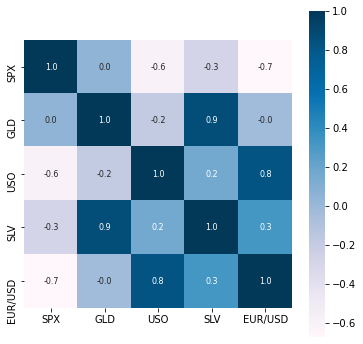

In [52]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation, cbar=True, fmt='.1f',square=True,annot=True,annot_kws={'size':8}, cmap='PuBu')

Correlation values of Gold 

In [53]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


Checking the Distribution Plot for Gold

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


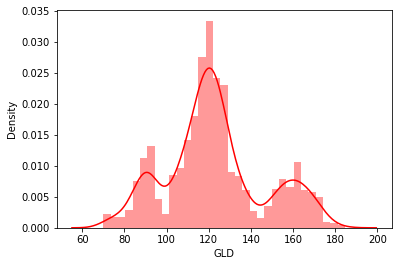

In [55]:
sns.distplot(gold_data['GLD'],color='red')

Splitting the features and Target

In [57]:
X = gold_data.drop(['Date', 'GLD'], axis=1)
y = gold_data['GLD']

In [58]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [59]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2,random_state = 2)

Model Training : Random Forest **Regressor**

In [61]:
 regressor = RandomForestRegressor(n_estimators=100)

In [62]:
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Model Evaluation

In [63]:
 test_data_prediction = regressor.predict(X_test)

In [64]:
print(test_data_prediction)

[168.4370993   81.93800005 116.10210059 127.60510084 120.74990134
 154.6766974  150.50619867 126.14920019 117.5062987  125.97170073
 116.97110064 171.92710037 140.75439856 167.7924986  115.34539995
 117.68190032 138.68020326 170.0161004  160.20060297 159.41469933
 155.10040033 125.04130001 176.04069973 157.28080343 125.27800042
  93.84419992  77.20290055 120.59610024 119.06899959 167.37390022
  88.28060036 125.2769999   91.07420054 117.74000033 121.15819938
 136.84010103 115.27990139 114.92840041 148.97389984 107.29530101
 104.47940248  87.18959794 126.65800079 117.97420021 154.37199908
 119.78869987 108.67000022 108.23059839  93.15020066 127.05329791
  75.46990013 113.6479993  121.12100046 111.23089924 119.05539911
 120.55139958 158.78889995 166.80910109 147.16899703  85.67149854
  94.31700044  86.81999899  90.53840044 119.01240095 126.36330068
 127.52160027 170.18450009 122.15799929 117.56889896  98.42730069
 167.95580158 143.31329869 132.23460235 121.08580224 121.18589901
 119.71120

In [66]:
error_score = metrics.r2_score(y_test,  test_data_prediction)

In [67]:
error_score

0.9892259198904545

In [100]:
test = (1447.160034,78.470001,15.1800,1.471692)
testasarray = np.asarray(test)
reshape_testasarray = testasarray.reshape(1,-1)

In [101]:
regressor.predict(reshape_testasarray)

array([84.94229981])

In [88]:
y_test = list(y_test)

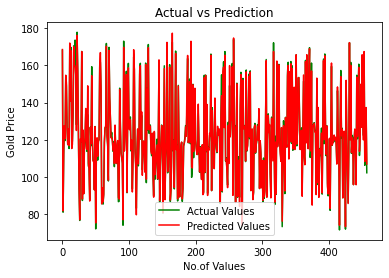

In [89]:
plt.plot(y_test, color = 'green', label = 'Actual Values')
plt.plot(test_data_prediction, color = 'red', label = 'Predicted Values')
plt.title('Actual vs Prediction')
plt.xlabel('No.of Values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()